In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("data/data.txt")
df = df.drop(columns='Unnamed: 0')
df.head()

,iso_code,location,continent,date,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
0,ALB,Albania,Europe,2020-02-25,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
1,ALB,Albania,Europe,2020-02-26,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
2,ALB,Albania,Europe,2020-02-27,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
3,ALB,Albania,Europe,2020-02-28,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
4,ALB,Albania,Europe,2020-02-29,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0


In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
new_cases_per_million,1.000000,0.861841,-0.049752,0.387745,0.199990,0.151923,0.181845,-0.063537
new_cases_smoothed_per_million,0.861841,1.000000,-0.062463,0.439031,0.230480,0.174211,0.209564,-0.079141
stringency_index,-0.049752,-0.062463,1.000000,0.069490,0.005701,-0.111798,-0.014063,0.488462
positive_rate,0.387745,0.439031,0.069490,1.000000,-0.043656,-0.156852,-0.067758,-0.117077
human_development_index,0.199990,0.230480,0.005701,-0.043656,1.000000,0.638858,0.836440,0.185445
cost_living_index,0.151923,0.174211,-0.111798,-0.156852,0.638858,1.000000,0.617476,0.143156
tourist_service_index,0.181845,0.209564,-0.014063,-0.067758,0.836440,0.617476,1.000000,0.140614
international_travel_controls,-0.063537,-0.079141,0.488462,-0.117077,0.185445,0.143156,0.140614,1.000000


In [4]:
df_new = df.drop(columns=['new_cases_smoothed_per_million', "human_development_index"])
df_new.head()

,iso_code,location,continent,date,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
0,ALB,Albania,Europe,2020-02-25,NaN,8.33,NaN,35.5,4.01,1.0
1,ALB,Albania,Europe,2020-02-26,NaN,8.33,NaN,35.5,4.01,1.0
2,ALB,Albania,Europe,2020-02-27,NaN,8.33,NaN,35.5,4.01,1.0
3,ALB,Albania,Europe,2020-02-28,NaN,8.33,NaN,35.5,4.01,1.0
4,ALB,Albania,Europe,2020-02-29,NaN,8.33,NaN,35.5,4.01,1.0


In [5]:
corr_new = df_new.corr()
corr_new.style.background_gradient(cmap='coolwarm')

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
new_cases_per_million,1.000000,-0.049752,0.387745,0.151923,0.181845,-0.063537
stringency_index,-0.049752,1.000000,0.069490,-0.111798,-0.014063,0.488462
positive_rate,0.387745,0.069490,1.000000,-0.156852,-0.067758,-0.117077
cost_living_index,0.151923,-0.111798,-0.156852,1.000000,0.617476,0.143156
tourist_service_index,0.181845,-0.014063,-0.067758,0.617476,1.000000,0.140614
international_travel_controls,-0.063537,0.488462,-0.117077,0.143156,0.140614,1.000000


In [6]:
x = df_new.iloc[:,4:] # 1t for rows and second for columns
x.head()

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
0,NaN,8.33,NaN,35.5,4.01,1.0
1,NaN,8.33,NaN,35.5,4.01,1.0
2,NaN,8.33,NaN,35.5,4.01,1.0
3,NaN,8.33,NaN,35.5,4.01,1.0
4,NaN,8.33,NaN,35.5,4.01,1.0


In [7]:
x.isna().sum()

new_cases_per_million              510
stringency_index                  3422
positive_rate                    24328
cost_living_index                    0
tourist_service_index             2213
international_travel_controls     2493
dtype: int64

In [8]:
column_means = x.mean()
x_new = x.fillna(column_means)
x_new.head()

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
0,207.814059,8.33,0.101155,35.5,4.01,1.0
1,207.814059,8.33,0.101155,35.5,4.01,1.0
2,207.814059,8.33,0.101155,35.5,4.01,1.0
3,207.814059,8.33,0.101155,35.5,4.01,1.0
4,207.814059,8.33,0.101155,35.5,4.01,1.0


Text(0, 0.5, 'WCSS')

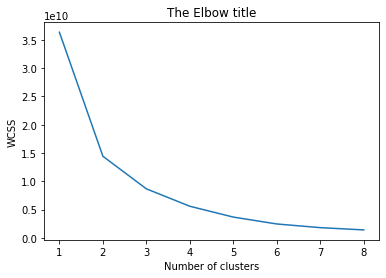

In [9]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(x_new)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,9)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [10]:
kmeans = KMeans(8)
kmeans.fit(x_new)
identified_clusters = kmeans.fit_predict(x_new)
identified_clusters

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

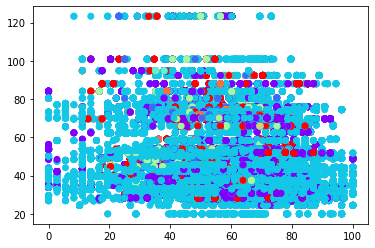

In [11]:
data_with_clusters = df_new.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['stringency_index'],data_with_clusters['cost_living_index'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [12]:
df_new.head()

,iso_code,location,continent,date,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
0,ALB,Albania,Europe,2020-02-25,NaN,8.33,NaN,35.5,4.01,1.0
1,ALB,Albania,Europe,2020-02-26,NaN,8.33,NaN,35.5,4.01,1.0
2,ALB,Albania,Europe,2020-02-27,NaN,8.33,NaN,35.5,4.01,1.0
3,ALB,Albania,Europe,2020-02-28,NaN,8.33,NaN,35.5,4.01,1.0
4,ALB,Albania,Europe,2020-02-29,NaN,8.33,NaN,35.5,4.01,1.0


In [13]:
df_new["date"] = pd.to_datetime(df_new["date"])

In [14]:
feb = (df_new['date'] >= '2022-02-01') & (df_new['date'] < '2022-03-01')
df_feb = df_new.loc[feb]
df_feb.head()

,iso_code,location,continent,date,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
707,ALB,Albania,Europe,2022-02-01,0.000,61.11,0.6065,35.5,4.01,3.0
708,ALB,Albania,Europe,2022-02-02,938.762,61.11,0.6046,35.5,4.01,3.0
709,ALB,Albania,Europe,2022-02-03,0.000,61.11,0.5827,35.5,4.01,3.0
710,ALB,Albania,Europe,2022-02-04,672.483,61.11,0.6246,35.5,4.01,3.0
711,ALB,Albania,Europe,2022-02-05,0.000,61.11,0.6413,35.5,4.01,3.0


In [15]:
df_feb = df_feb.drop(columns=['iso_code', "continent", "date"])
df_feb.head()

,location,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
707,Albania,0.000,61.11,0.6065,35.5,4.01,3.0
708,Albania,938.762,61.11,0.6046,35.5,4.01,3.0
709,Albania,0.000,61.11,0.5827,35.5,4.01,3.0
710,Albania,672.483,61.11,0.6246,35.5,4.01,3.0
711,Albania,0.000,61.11,0.6413,35.5,4.01,3.0


In [16]:
import plotly.express as px

In [17]:
feb_groupped = df_feb.groupby("location").agg({'new_cases_per_million':'sum','stringency_index':'mean','positive_rate':'mean',"cost_living_index":"mean", "tourist_service_index":"mean", "international_travel_controls":"mean"})
feb_groupped.head()

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
location,,,,,,
Albania,4531.952,61.110000,0.519526,35.50,4.01,3.0
Algeria,287.317,59.653214,NaN,26.87,1.84,3.0
Argentina,11445.908,35.190000,0.229107,34.69,4.53,2.0
Armenia,17531.926,NaN,0.300214,33.89,4.33,NaN
Australia,25484.702,53.177143,0.271000,77.75,6.06,3.0


In [18]:
column_means = feb_groupped.mean()
feb_new = feb_groupped.fillna(column_means)
feb_new.head()

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
location,,,,,,
Albania,4531.952,61.110000,0.519526,35.50,4.01,3.000000
Algeria,287.317,59.653214,0.221399,26.87,1.84,3.000000
Argentina,11445.908,35.190000,0.229107,34.69,4.53,2.000000
Armenia,17531.926,46.990653,0.300214,33.89,4.33,2.083755
Australia,25484.702,53.177143,0.271000,77.75,6.06,3.000000


Text(0, 0.5, 'WCSS')

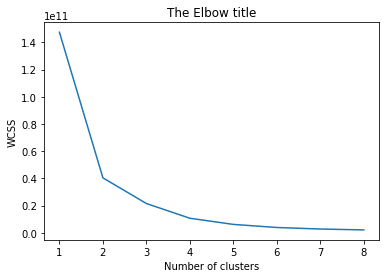

In [19]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(feb_new)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,9)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [20]:
kmeans = KMeans(8)
kmeans.fit(feb_new)
identified_clusters = kmeans.fit_predict(feb_new)
identified_clusters

array([0, 0, 7, 7, 4, 1, 7, 1, 0, 4, 4, 0, 0, 7, 7, 0, 0, 0, 2, 0, 0, 7,
       4, 1, 5, 0, 0, 0, 0, 6, 0, 4, 2, 6, 2, 0, 2, 0, 0, 4, 7, 5, 0, 0,
       0, 7, 1, 4, 0, 7, 4, 0, 0, 7, 3, 7, 1, 4, 7, 0, 2, 0, 7, 7, 7, 0,
       0, 0, 6, 7, 0, 0, 7, 1, 0, 0, 7, 0, 0, 0, 7, 2, 0, 4, 4, 0, 0, 0,
       4, 7, 1, 6, 1, 0, 2, 7, 0, 0, 4, 1, 0, 0, 0, 0, 4, 0, 7, 0, 7, 7,
       2, 0, 7, 0, 0, 0], dtype=int32)

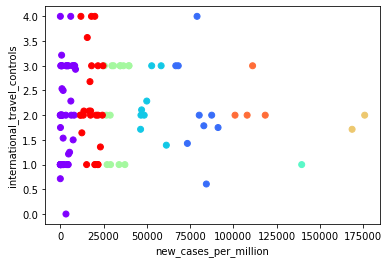

In [21]:
data_with_clusters = feb_new.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['new_cases_per_million'],data_with_clusters['international_travel_controls'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel("new_cases_per_million")
plt.ylabel("international_travel_controls")
plt.show()

In [22]:
df_feb_map = pd.DataFrame(df_feb, columns=['iso_code', 'cost_living_index', 'service_index'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])

df['Cluster'] = y